In [1]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np

 <h1><center><font color='red'>gama coorection</font></center></h1>

hist_ex
dark
light
moon

In [2]:
def imshow(images):
    image_num = len(images)
    plt.figure(figsize=(10,10))
    for i in range(1,image_num+1):
        plt.subplot(1,image_num,i)
        plt.imshow(images[i-1],cmap='gray')

In [3]:
def gama_correction(image,gama=1):
    gray_map = np.array([((i/255)**gama)*255 for i in range(256)]).astype(np.uint8)
    out_image = cv2.LUT(image,gray_map)
    return out_image

In [4]:
image = cv2.imread('./images/dark.jpg',0)
out_image = gama_correction(image,gama=0.5)

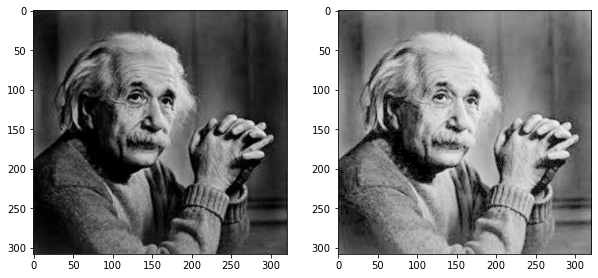

In [5]:
imshow([image,out_image])

 <h1><center><font color='red'>cal Histogram</font></center></h1>

In [6]:
def cal_hist(image,imshow=True):
    row,col = image.shape
    hist = np.zeros(256)
    for i in range(row):
        for j in range(col):
            hist[image[i,j]]+=1
    if imshow:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.imshow(image,cmap='gray')
        plt.subplot(1,2,2)
        plt.bar(range(256),hist)
    return hist

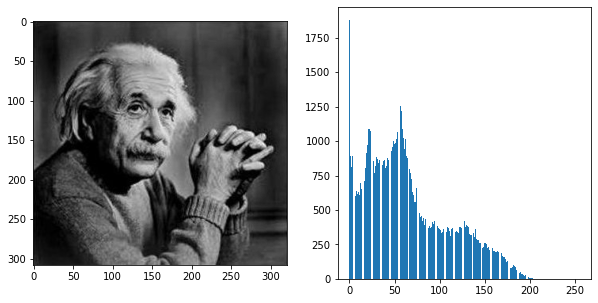

In [43]:
hist = cal_hist(image)

 <h1><center><font color='red'>cal cdf</font></center></h1>

In [44]:
def cal_cdf(histogram,imshow=True):
    cdf = np.cumsum(histogram)
    cdf /= np.max(cdf)
    if imshow:
        plt.plot(cdf)
    return cdf

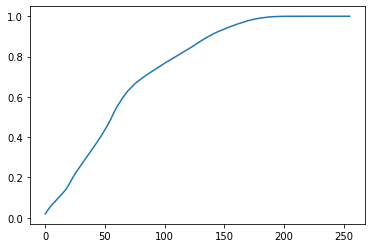

In [46]:
cdf = cal_cdf(hist)

<h1><center><font color='red'>hist opencv</font></center></h1>

In [48]:
hist_opencv = cv2.calcHist([image],[0],None,[256],[0,256])

<h1><center><font color='red'>hist equ</font></center></h1>

In [52]:
def hist_eq(image):
    hist = cal_hist(image,imshow=False)
    cdf = cal_cdf(hist,imshow=False)
    gray_map = np.array([round(cdf[i]*255)for i in range(256)]).astype(np.uint8)
    out_image = cv2.LUT(image,gray_map)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_image,cmap='gray')

In [57]:
image = cv2.imread('./images/moon.png',0)

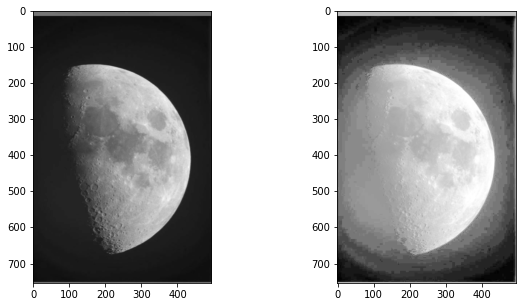

In [58]:
hist_eq(image)

<h1><center><font color='red'>hist equ open cv</font></center></h1>

In [59]:
out_image = cv2.equalizeHist(image)

<h1><center><font color='red'>CLAHE</font></center></h1>

In [61]:
clahe = cv2.createCLAHE(clipLimit=3.0,tileGridSize=(11,11))

In [62]:
out_image = clahe.apply(image)

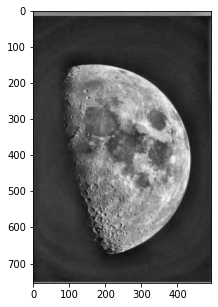

In [64]:
plt.figure(figsize=(10,5))
plt.imshow(out_image,cmap='gray')

<h1><center><font color='red'>RGB hist eg</font></center></h1>

In [66]:
image = cv2.imread('./images/monkey.jpg')

In [67]:
h,s,v = cv2.split(cv2.cvtColor(image,cv2.COLOR_BGR2HSV))

In [68]:
v_new = cv2.equalizeHist(v)

In [71]:
new_image = cv2.cvtColor(cv2.merge((h,s,v_new)),cv2.COLOR_HSV2RGB)

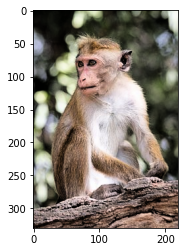

In [72]:
plt.imshow(new_image)